# Taanshu Babariya 03
## 21/01/26
### Experiment-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.
### ML LAB
### PID - 246001

In [1]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Step-2: Input data
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [3]:
#Step-3: Create model and Fit data
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [4]:
#Step-4: Get Coefficients and print
w = model.coef_[0]
b = model.intercept_
print(f"The slope is: {w}")
print(f"The intercept is: {b}")

The slope is: 1.4999999999999993
The intercept is: 0.3333333333333348


In [5]:
#Step-5: Make predictions
y_pred = model.predict(x)
print("\nPredictions fro traning data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi},Predicted y = {ypi}")


Predictions fro traning data
x = 1, Actual y = 2,Predicted y = 1.8333333333333341
x = 2, Actual y = 3,Predicted y = 3.3333333333333335
x = 3, Actual y = 5,Predicted y = 4.833333333333333


In [6]:
#Step-6: error calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Sqaured Error is: {mse}")
print(f"R2 Score is: {r2}")

Mean Sqaured Error is: 0.05555555555555553
R2 Score is: 0.9642857142857143


## LR Using MLE

In [7]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [8]:
#Step-2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [9]:
#Step-3: Negative Log Likelihood function
def neg_log_likelihood(params):
    w,b = params
    sigma2 = 1 # assume varience =1
    y_pred = w*x + b
    nll = 0.5*np.sum((y-y_pred)**2 /sigma2)
    return nll

In [10]:
# Initial values fro w and b
initial_guess= [0,0]

In [11]:
# Step-4: Minimize nll
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"Slope is: {w_mle}")
print(f"Intercept is: {b_mle}")

Slope is: 1.500000003897125
Intercept is: 0.3333333918730798


In [12]:
#Step-5: Prediction
y_pred = w_mle * x + b_mle
print("\npredictions for  training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi},Predicted y = {ypi}")


predictions for  training data
x = 1, Actual y = 2,Predicted y = 1.833333395770205
x = 2, Actual y = 3,Predicted y = 3.33333339966733
x = 3, Actual y = 5,Predicted y = 4.833333403564454


In [13]:
#Step-6: error calculate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Sqaured Error is: {mse}")
print(f"R2 Score is: {r2}")

Mean Sqaured Error is: 0.05555555555556004
R2 Score is: 0.9642857142857114


## LR Using GD

In [14]:
#Step-1: imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [15]:
#Step-2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [16]:
#Step-3: 
w, b =0,0
alpha = 0.001
n_iter = 10000
n = len(x)

In [17]:
for i in range(n_iter):
    y_pred = w * x.flatten() + b
    dw = (-2/n)*np.sum(x.flatten()*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)
    w = w -alpha * dw
    b -= alpha * db
print(f"The slope is: {w}")
print(f"The bais is: {b}")

The slope is: 1.4891282998341364
The bais is: 0.35804726319993174


## LR USing GD with single parameter

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#Step-2: Input data
x = np.array([1,2,3])
y = np.array([2,3,5])

In [20]:
#Step-3: Calculate Loss function
def loss(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y-y_pred)**2)

In [21]:
#Step-4: Calculate gradient of J wrt w1

In [22]:
def gradient(w1):
    w0 = np.mean(y) - w1*np.mean(x)
    y_pred = w1 * x + w0
    return -2*np.sum(x * (y-y_pred))

In [23]:
#Gradient decent
lr = 0.1
w1 = 4
n_iter = 15
w1_values = []
loss_values = []

for i in range(n_iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr*grad

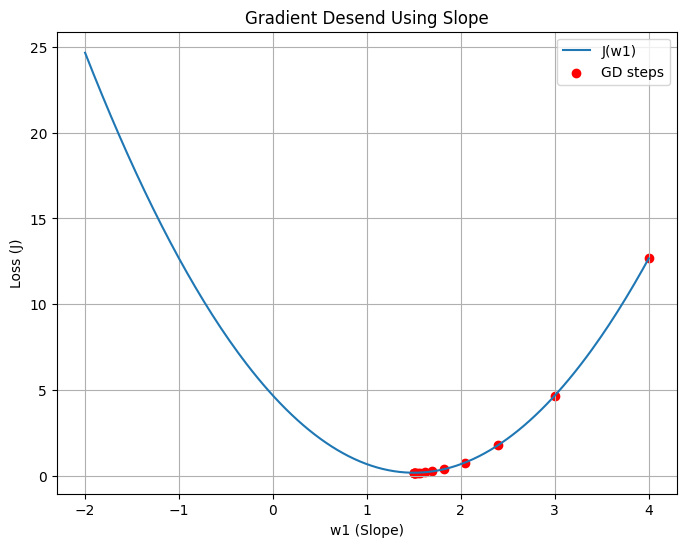

In [24]:
#Step-6: Plot loss function and GD
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize = (8,6))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="GD steps")
plt.xlabel("w1 (Slope)")
plt.ylabel("Loss (J)")
plt.title("Gradient Desend Using Slope")
plt.legend()
plt.grid(True)
plt.show()